In [2]:
# Import required libraries and dependencies
import pandas as pd
import hvplot.pandas
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [3]:
# Load the data into a Pandas DataFrame
df_market_data = pd.read_csv(
    "Resources/crypto_market_data.csv",
    index_col="coin_id")

# Display sample data
df_market_data.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408


In [4]:
# Generate summary statistics
df_market_data.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


In [5]:
# Plot your data to see what's in your DataFrame
df_market_data.hvplot.line(
    width=800,
    height=400,
    rot=90
)

:NdOverlay   [Variable]
   :Curve   [coin_id]   (value)

---

### Prepare the Data

In [7]:
# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file
scaler = StandardScaler()
numerical_columns = df_market_data.select_dtypes(include=['int64', 'float64']).columns
df_market_data_scaled = scaler.fit_transform(df_market_data[numerical_columns])
df_market_data_scaled[0:3]

array([[ 0.50852937,  0.49319307,  0.77220043,  0.23545963, -0.0674951 ,
        -0.35595348, -0.25163688],
       [ 0.18544589,  0.93444504,  0.55869212, -0.05434093, -0.27348273,
        -0.11575947, -0.19935211],
       [ 0.02177396, -0.70633685, -0.02168042, -0.06103015,  0.00800452,
        -0.55024692, -0.28206051]])

In [13]:
# Create a DataFrame with the scaled data
df_market_data_scaled = pd.DataFrame(df_market_data_scaled,columns=numerical_columns)

# Copy the crypto names from the original data
df_market_data_scaled["coin_id"] = df_market_data.index
# Set the coinid column as index
df_market_data_scaled = df_market_data_scaled.set_index("coin_id")

# Display sample data
df_market_data_scaled.head(5)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317


---

### Find the Best Value for k Using the Original Data.

In [7]:
# Create a list with the number of k-values from 1 to 11


In [14]:
# Create an empty list to store the inertia values
inertia = []
k_values = list(range(1,11))
# Create a for loop to compute the inertia with each possible value of k
for k in k_values:
    model = KMeans(n_clusters=k,random_state=10, n_init="auto")
    model.fit(df_market_data_scaled)
    inertia.append(model.inertia_)
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using `df_market_data_scaled`
# 3. Append the model.inertia_ to the inertia list


c:\Users\OMEN\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\OMEN\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\OMEN\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\OMEN\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows wi

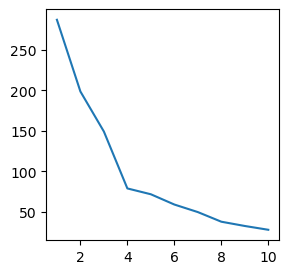

In [15]:
# Create a dictionary with the data to plot the Elbow curve
import matplotlib.pyplot as plt

# Create a DataFrame with the data to plot the Elbow curve
plt.figure(figsize=(3,3))
plt.plot(range(1,11), inertia)

In [17]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
elbow_curve = {"k_values" :k_values, "inertia":inertia}

# Create a DataFrame with the data to plot the Elbow curve
elbow_curve_df = pd.DataFrame(elbow_curve)

elbow_curve_df

,k_values,inertia
0,1,287.000000
1,2,198.571818
2,3,149.172746
3,4,79.022435
4,5,71.819986
5,6,59.172566
6,7,49.855918
7,8,37.984700
8,9,32.719152
9,10,28.035594


#### Answer the following question: 

**Question:** What is the best value for `k`?

**Answer:** Based on the plotted inertia the optimal value for k is 4 clusters

---

### Cluster Cryptocurrencies with K-means Using the Original Data

In [38]:
# 4 clusters
model2 = KMeans(n_clusters=4,random_state=10, n_init="auto")
model2.fit(df_market_data_scaled)

c:\Users\OMEN\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=4, n_init='auto', random_state=10)

In [12]:
# Fit the K-Means model using the scaled data


In [39]:
# Predict the clusters to group the cryptocurrencies using the scaled data
predictions = model2.predict(df_market_data_scaled)

# Print the resulting array of cluster values.
print(predictions)

[1 1 0 0 1 1 1 1 1 0 0 0 0 1 0 1 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 2 1 0 0 3
 0 0 0 0]


In [40]:
# Create a copy of the DataFrame
df_market_data_scaled_pred = df_market_data_scaled
df_market_data_scaled_pred.head(5)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y,predictions
coin_id,,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637,2
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352,2
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061,0
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546,0
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317,2


In [41]:
# Add a new column to the DataFrame with the predicted clusters
df_market_data_scaled_pred["predictions"] = predictions

# Display sample data
df_market_data_scaled_pred.head(5)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y,predictions
coin_id,,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637,1
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352,1
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061,0
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546,0
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317,1


In [61]:
# Create a scatter plot using hvPlot by setting 
# `x="price_change_percentage_24h"` and `y="price_change_percentage_7d"`. 
# Color the graph points with the labels found using K-Means and 
# add the crypto name in the `hover_cols` parameter to identify 
# the cryptocurrency represented by each data point.
plot1 =df_market_data_scaled_pred.hvplot.scatter(
    x="price_change_percentage_24h",
    y="price_change_percentage_7d",
    by="predictions",
    hover_cols = ["coin_id"], 
    title = "k=4"
)
plot1

:NdOverlay   [predictions]
   :Scatter   [price_change_percentage_24h]   (price_change_percentage_7d,coin_id)

---

### Optimize Clusters with Principal Component Analysis.

In [27]:
# Create a PCA model instance and set `n_components=3`.
pca = PCA(n_components=3)

In [43]:
# Use the PCA model with `fit_transform` to reduce to 
# three principal components.
pca_data = pca.fit_transform(df_market_data_scaled_pred)
# View the first five rows of the DataFrame. 
pca_data[:5]

array([[ 1.02716415e-01, -1.09294014e+00,  5.35184395e-01],
       [ 7.67117769e-02, -7.04779064e-01,  1.03685543e+00],
       [-6.19998579e-01, -1.97690890e-02, -6.54034410e-01],
       [-6.64724714e-01,  2.17397355e-03, -4.85221049e-01],
       [ 2.88738674e-01, -2.43700872e+00,  1.79915657e+00]])

In [44]:
# Retrieve the explained variance to determine how much information 
# can be attributed to each principal component.
pca.explained_variance_ratio_
pca.explained_variance_ratio_.sum()

0.8918896809358547

#### Answer the following question: 

**Question:** What is the total explained variance of the three principal components?

**Answer:** The explained variance accounts for 0.8918

In [45]:
# Create a new DataFrame with the PCA data.
pca_data_df = pd.DataFrame(pca_data,columns=['PC1','PC2','PC3'])
# Creating a DataFrame with the PCA data

# Copy the crypto names from the original data
pca_data_df["coin_id"] = df_market_data.index

# Set the coinid column as index
pca_data_df = pca_data_df.set_index("coin_id")


# Display sample data
pca_data_df.head(5)

,PC1,PC2,PC3
coin_id,,,
bitcoin,0.102716,-1.092940,0.535184
ethereum,0.076712,-0.704779,1.036855
tether,-0.619999,-0.019769,-0.654034
ripple,-0.664725,0.002174,-0.485221
bitcoin-cash,0.288739,-2.437009,1.799157


---

### Find the Best Value for k Using the PCA Data

In [21]:
# Create a list with the number of k-values from 1 to 11


In [46]:
# Create an empty list to store the inertia values


# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using `df_market_data_pca`
# 3. Append the model.inertia_ to the inertia list
inertia2 = []
for k in k_values:
    model3 = KMeans(n_clusters=k,random_state=10, n_init="auto")
    model3.fit(pca_data_df)
    inertia2.append(model3.inertia_)

c:\Users\OMEN\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\OMEN\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\OMEN\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\OMEN\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows wi

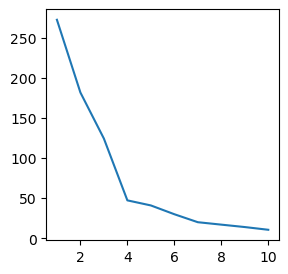

In [47]:
# Create a dictionary with the data to plot the Elbow curve

# Create a DataFrame with the data to plot the Elbow curve
plt.figure(figsize=(3,3))
plt.plot(range(1,11), inertia2)

In [24]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.


#### Answer the following questions: 

* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer:** The best value is 4


* **Question:** Does it differ from the best k value found using the original data?

  * **Answer:** It is consistent with the las optimal value

### Cluster Cryptocurrencies with K-means Using the PCA Data

In [48]:
# Initialize the K-Means model using the best value for k
model4 = KMeans(n_clusters=4, random_state=10, n_init="auto")
model4.fit(pca_data_df)

c:\Users\OMEN\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=4, n_init='auto', random_state=10)

In [26]:
# Fit the K-Means model using the PCA data


In [49]:
# Predict the clusters to group the cryptocurrencies using the PCA data
predictions2 = model4.predict(pca_data_df)
# Print the resulting array of cluster values.
print(predictions2)

[2 2 0 0 2 2 2 2 2 0 0 0 0 2 0 2 0 0 2 0 0 2 0 0 0 0 0 0 2 0 0 0 1 2 0 0 3
 0 0 0 0]


In [50]:
# Create a copy of the DataFrame with the PCA data
df_market_data_pca_predictions = pca_data_df

# Add a new column to the DataFrame with the predicted clusters
df_market_data_pca_predictions["PCACluster"] = predictions2

# Display sample data
df_market_data_pca_predictions.head()

,PC1,PC2,PC3,PCACluster
coin_id,,,,
bitcoin,0.102716,-1.092940,0.535184,2
ethereum,0.076712,-0.704779,1.036855,2
tether,-0.619999,-0.019769,-0.654034,0
ripple,-0.664725,0.002174,-0.485221,0
bitcoin-cash,0.288739,-2.437009,1.799157,2


In [59]:
# Create a scatter plot using hvPlot by setting 
# `x="PC1"` and `y="PC2"`. 
# Color the graph points with the labels found using K-Means and 
# add the crypto name in the `hover_cols` parameter to identify 
# the cryptocurrency represented by each data point.
plot2 = df_market_data_pca_predictions.hvplot.scatter(
    x="PC1",
    y="PC2",
    by="PCACluster",
    title = "Scatter Plot by Stock Segment - PCA=2"
)
plot2

:NdOverlay   [PCACluster]
   :Scatter   [PC1]   (PC2)

### Visualize and Compare the Results

In this section, you will visually analyze the cluster analysis results by contrasting the outcome with and without using the optimization techniques.

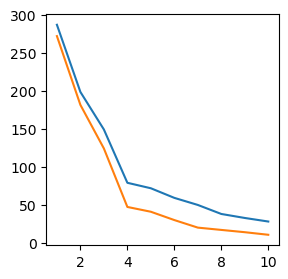

In [55]:
# Composite plot to contrast the Elbow curves
plt.figure(figsize=(3,3))
plt.plot(range(1,11), inertia,label="scaled")
plt.plot(k_values, inertia2, label="PCA")

In [62]:
# Composite plot to contrast the clusters
plot1*plot2
# YOUR CODE HERE!

:Overlay
   .NdOverlay.I  :NdOverlay   [predictions]
      :Scatter   [price_change_percentage_24h]   (price_change_percentage_7d,coin_id)
   .NdOverlay.II :NdOverlay   [PCACluster]
      :Scatter   [PC1]   (PC2)

#### Answer the following question: 

  * **Question:** After visually analyzing the cluster analysis results, what is the impact of using fewer features to cluster the data using K-Means?

  * **Answer:** The model is underfitted which means less of the variance is explained by the predictions.